In [1]:
from trainer import model, input, evaluator
import argparse
import tensorflow as tf
import matplotlib.pyplot as plt
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Visualization

In [2]:
def generate_and_show_image(evaluator, image_path):
    test_input = tf.expand_dims(input.process_test(image_path), 0) * 0.5 + 0.5
    prediction2 = evaluator.get_smile(image_path)

    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction2 / 255]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()

In [3]:
def generate_and_save_image(evaluator, image_path, filename):
    
    test_input = tf.expand_dims(input.process_test(image_path), 0) * 0.5 + 0.5
    prediction2 = evaluator.get_smile(image_path)

    plt.figure(figsize=(12, 12))

    display_list = [test_input[0], prediction2 / 255]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        # getting the pixel values between [0, 1] to plot it.
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.savefig(filename + ".png", bbox_inches = 'tight', pad_inches = 0)
    plt.close()

# Evaluator

In [4]:
stats_data = input.get_train_input("gs://setyongr_ai/FEICropTrain/")[1]
evaluator = evaluator.Evaluator(job_dir="../checkpoint", stats_data_gen=stats_data)

Initializing Model
Using UNet Generator
Loading Checkpoint
Latest checkpoint restored!!
Model Initialized


# Batch Generator Test

In [5]:
test_dir = "gs://setyongr_ai/FEICropTest/"

In [6]:
# neutral_test_ds = tf.data.Dataset.list_files(test_dir + '*a.jpg')
# file_num = 1
# for test_image in neutral_test_ds:
#     generate_and_save_image(evaluator, test_image, "../test_imgs/" + str(file_num))
#     file_num += 1

In [7]:
smiles = evaluator.get_smiles(input.get_test_input(test_dir)[1])

In [8]:
evaluator.calculate_fid(smiles)

56.29856074755114

# Single Generator Test

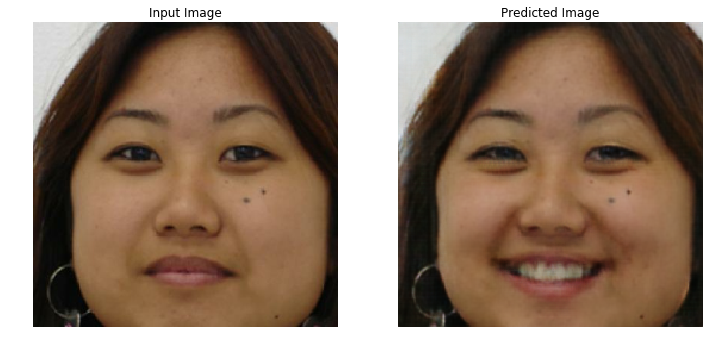

In [9]:
test_image = "../Testing/162a.jpg"
generate_and_show_image(evaluator, test_image)

## Calculate FID

In [10]:
image_gen = evaluator.get_smile(test_image)

In [11]:
evaluator.calculate_fid_single(image_gen)

297.91205242110175